# Capstone Project - Car Accidents
### Michael Serrano - Applied Data Science Capstone by IBM/Coursera

## Table of Contents
- [Introduction: Business Problem](#first_bullet)
- [Data Understanding](#second_bullet)
- [Methodology](#third_bullet)
- [Analysis](#fourth_bullet)
  - [Data Cleaning, Data Preparation, and Feature Selection](#fourth1_bullet)
  - [Exploratory Data Analysis](#fourth2_bullet)
  - [Modelling](#fourth3_bullet)
- [Results and Discussion](#fifth_bullet)
- [Conclusion](#sixth_bullet)

## Introduction: Business Problem<a class="anchor" id="first_bullet"></a>

Motor accidents are often seen as unfortunate but inevitable daily occurances, costing money and lives. It would be invaluable for the Department of Transportation to be able to predict when and where accidents are most likely to happen in order to prepare both warning signs and medical personnel on days of high risk. Additionally, accidents would be mitigated if preventable links to accidents were identified and addressed.

We will use data science to identify factors that are related to fatal accidents. The general severity of accidents on high-risk combinations of factors will be displayed so that the Department can decide what can be predicted and what can be prevented.

## Data Understanding<a class="anchor" id="second_bullet"></a>
A model trained on historic crash data could identify characteristics of severe accidents. Possible factors related to accidents could be:
- Weather
- Time of Day
- Road Type (e.g. Highway, Local, etc.)

Based on these necessary features, the 2018 Fatality Analysis Reporting System (FARS) Data was seen to be a good fit for the problem.

### In-Depth Data Source Information
[2018 FARS Data](https://www.nhtsa.gov/content/nhtsa-ftp/176776)  
The 2018 FARS Data includes multiple .csv files such as "accident","damage","drugs", and "vehicle"; however, this model will be trained purely on the "accident" file, which has 52 features. Pertinent features include:
- Hour of the Crash ("HOUR")
- Road Type ("ROUTE")
- Light Conditions ("LGT_COND")
- Weather ("WEATHER")
- Fatalities ("FATALS")

We will focus on these features for the purpose of training and testing the model. The "FATALS" feature will be our target variable since accidents are considered more severe when fatalities are higher.

## Methodology<a class="anchor" id="third_bullet"></a>
In this project, we will make use of the 2018 FARS Data to identify characteristics of fatal crashes.

Our first step was collecting the data (2018 FARS). We have also identified some key features that we would like to analyze.

Our next step will be to clean the data, select the pertinent features, and convert our categorical features into multiple features that can be analyzed by ML models.

Finally, ML models will be implemented to find characteristics of the most fatal accidents. **We will not predict future accidents** because our dataset only consists of accidents; classifying whether an accident will occur based on future conditions would be biased and untrustworthy outside of our data.

## Analysis<a class="anchor" id="fourth_bullet"></a>

### Data Cleaning, Data Preparation, and Feature Selection<a class="anchor" id="fourth1_bullet"></a>
Let's upload the dataframe and remove unnecessary features and incomplete values. Let's also One-Hot Encode the "ROUTE", "WEATHER", and "LGT_COND" features, as their current values do not mean anything useful to a ML model.

In [3]:
import numpy as np
import pandas as pd
df_accidents = pd.read_csv(body)
df_accidents.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [4]:
#Removing Extra Features
df_accidents_cleaned = df_accidents[['HOUR','ROUTE','MAN_COLL','LGT_COND','WEATHER','FATALS']]
df_accidents_cleaned.head()

,HOUR,ROUTE,MAN_COLL,LGT_COND,WEATHER,FATALS
0,6,1,0,4,1,1
1,0,1,0,2,2,2
2,22,1,0,2,10,1
3,13,1,0,1,10,1
4,7,1,1,1,1,1


In [5]:
#Removing values with unreported or unknown information
print(df_accidents_cleaned.shape)
df_accidents_cleaned = df_accidents_cleaned[(df_accidents_cleaned['MAN_COLL'] != 98) & (df_accidents_cleaned['MAN_COLL'] != 99)]
df_accidents_cleaned = df_accidents_cleaned[(df_accidents_cleaned['ROUTE'] != 9) & (df_accidents_cleaned['ROUTE'] != 8)]
df_accidents_cleaned = df_accidents_cleaned[(df_accidents_cleaned['LGT_COND'] != 9) & (df_accidents_cleaned['LGT_COND'] != 6) & (df_accidents_cleaned['LGT_COND'] != 7) & (df_accidents_cleaned['LGT_COND'] != 8)]
df_accidents_cleaned = df_accidents_cleaned[df_accidents_cleaned['HOUR'] != 99]
df_accidents_cleaned = df_accidents_cleaned[(df_accidents_cleaned['WEATHER'] != 98) & (df_accidents_cleaned['WEATHER'] != 99) & (df_accidents_cleaned['WEATHER'] != 8)]
print(df_accidents_cleaned.shape)

(33654, 6)
(27033, 6)


In [6]:
#One-Hot Encoding Route, Weather, and Light Conditions
df_weather = pd.get_dummies(df_accidents_cleaned.WEATHER)
df_light = pd.get_dummies(df_accidents_cleaned.LGT_COND)
df_route = pd.get_dummies(df_accidents_cleaned.ROUTE)
weather = ['CLEAR','RAIN','SLEET/HAIL','SNOW','FOG/SMOG','WIND','SAND/DIRT','CLOUDS','BLOWING SNOW','FREEZING RAIN']
light = ['DAYLIGHT','DARK UNLIGHTED','DARK LIGHTED','DAWN','DUSK']
route = ['INTERSTATE','US HIGHWAY','STATE HIGHWAY','COUNTY ROAD','LOCAL TOWNSHIP','LOCAL MUNI','LOCAL FRONT']
df_weather.columns = weather
df_light.columns = light
df_route.columns = route
df_accidents_cleaned = pd.concat([df_accidents_cleaned,df_weather,df_light,df_route],axis=1)
df_accidents_cleaned.drop(columns=['WEATHER','LGT_COND','ROUTE','MAN_COLL'],inplace=True)
df_accidents_cleaned.head()

,HOUR,FATALS,CLEAR,RAIN,SLEET/HAIL,SNOW,FOG/SMOG,WIND,SAND/DIRT,CLOUDS,...,DARK LIGHTED,DAWN,DUSK,INTERSTATE,US HIGHWAY,STATE HIGHWAY,COUNTY ROAD,LOCAL TOWNSHIP,LOCAL MUNI,LOCAL FRONT
0,6,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,22,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,13,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,7,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Exploratory Data Analysis<a class="anchor" id="fourth2_bullet"></a>
Let's now visualise the relation between our features and the severity of the accident.

In [7]:
from matplotlib import pyplot as plt
df_weather_impact = df_accidents_cleaned[weather]
def get_weather(row):
    for i in df_weather_impact.columns:
        if row[i]==1:
            return i
df_weather_impact = pd.concat([pd.DataFrame(df_weather_impact.apply(get_weather,axis=1)),df_accidents_cleaned[['FATALS']]],axis=1)
df_weather_impact.columns = ['Weather','Fatalities']
df_weather_impact.groupby(['Weather']).mean().sort_values(['Fatalities'],ascending=False).plot(kind='bar')
plt.title("Average Fatalities/Accident versus Weather Conditions")
plt.xlabel('')
plt.legend('')
plt.ylabel('Fatalities/Accident')
plt.ylim(bottom=1)

(1, 1.218)

(1, 1.1560638873849485)

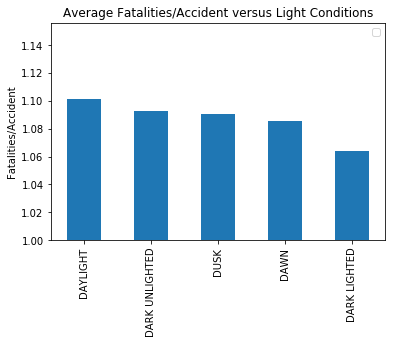

In [8]:
df_light_impact = df_accidents_cleaned[light]
def get_light(row):
    for i in df_light_impact.columns:
        if row[i]==1:
            return i
df_light_impact = pd.concat([pd.DataFrame(df_light_impact.apply(get_light,axis=1)),df_accidents_cleaned[['FATALS']]],axis=1)
df_light_impact.columns = ['Light','Fatalities']
df_light_impact.groupby(['Light']).mean().sort_values(['Fatalities'],ascending=False).plot(kind='bar')
plt.title("Average Fatalities/Accident versus Light Conditions")
plt.xlabel('')
plt.legend('')
plt.ylabel('Fatalities/Accident')
plt.ylim(bottom=1)

(1, 1.1765190525231721)

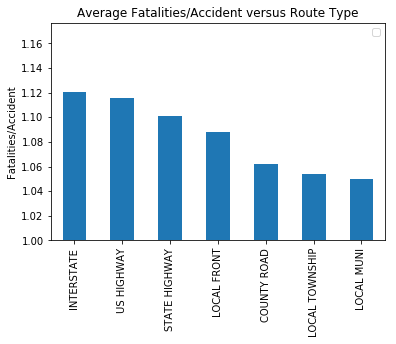

In [9]:
df_route_impact = df_accidents_cleaned[route]
def get_route(row):
    for i in df_route_impact.columns:
        if row[i]==1:
            return i
df_route_impact = pd.concat([pd.DataFrame(df_route_impact.apply(get_route,axis=1)),df_accidents_cleaned[['FATALS']]],axis=1)
df_route_impact.columns = ['Route','Fatalities']
df_route_impact.groupby(['Route']).mean().sort_values(['Fatalities'],ascending=False).plot(kind='bar')
plt.title("Average Fatalities/Accident versus Route Type")
plt.xlabel('')
plt.legend('')
plt.ylabel('Fatalities/Accident')
plt.ylim(bottom=1)

(1, 1.1727272727272726)

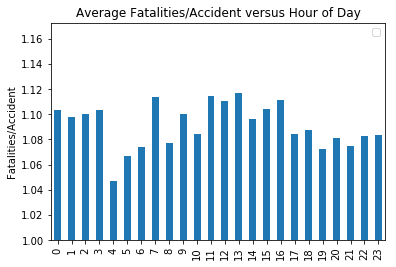

In [10]:
df_hour_impact = df_accidents_cleaned[['HOUR','FATALS']]
df_hour_impact.columns = ['Hour of Day','Fatalities']
df_hour_impact.groupby(['Hour of Day']).mean().sort_values(['Hour of Day']).plot(kind='bar')
plt.title("Average Fatalities/Accident versus Hour of Day")
plt.xlabel('')
plt.legend('')
plt.ylabel('Fatalities/Accident')
plt.ylim(bottom=1)

We are able to make several conclusions from our visualizations.
- Fatalaties are highest in bad weather and lowest in better weather. This makes sense as bad weather can make it harder to control your vehicle and see the road.
- Accidents in daylight are suprisingly more fatal than in the dark. This could be attributed to the higher traffic density during the day compared the the isolated incidents at night.
- Fatalaties are highest in interstates and lowest in local roads. This also makes sense as accidents at higher speeds are more likely to be fatal.
- Fatalities are highest from midnight to 3am, 7am, and 10 am to 4 pm. This could be because of typical rush hour times leading to higher traffic density than say 4 am.

### Modelling<a class="anchor" id="fourth3_bullet"></a>
We can use a **clustering model** to find characteristics of severe accidents. Unfortunately, the FARS data does not include data values for conditions that did not cause fatalities, so a classification model for predictions would be biased.

#### K Means Clustering

In [213]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
df_hour_normalized = df_accidents_cleaned[['HOUR']]/df_accidents_cleaned[['HOUR']].max()
df_not_hour = df_accidents_cleaned.loc[:,df_accidents_cleaned.columns != 'HOUR']
df_normalized = pd.concat([df_hour_normalized,df_not_hour],axis=1)
k_means.fit(df_normalized.loc[:,df_accidents_cleaned.columns != 'FATALS'],df_normalized['FATALS'])
k_means_labels = k_means.labels_

In [214]:
df_normalized['CLUSTER'] = k_means_labels
pd.set_option('display.max_columns', None)
df_normalized.groupby('CLUSTER').mean().sort_values('FATALS')

,HOUR,FATALS,CLEAR,RAIN,SLEET/HAIL,SNOW,FOG/SMOG,WIND,SAND/DIRT,CLOUDS,BLOWING SNOW,FREEZING RAIN,DAYLIGHT,DARK UNLIGHTED,DARK LIGHTED,DAWN,DUSK,INTERSTATE,US HIGHWAY,STATE HIGHWAY,COUNTY ROAD,LOCAL TOWNSHIP,LOCAL MUNI,LOCAL FRONT
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,
3,0.561500,1.063258,0.807801,0.123282,0.001819,0.010914,0.011924,0.000606,0.000000,0.042643,0.000404,0.000606,0.000000,0.000000,0.969887,0.012530,0.017583,0.134802,0.138440,0.255659,0.063258,0.019200,0.373888,0.014753
4,0.546910,1.090930,0.000000,0.006295,0.000466,0.002098,0.003964,0.000000,0.000233,0.986477,0.000000,0.000466,0.518536,0.297972,0.117976,0.033341,0.032175,0.147587,0.186990,0.340872,0.174633,0.036139,0.102821,0.010958
2,0.542015,1.093775,0.830575,0.114421,0.001734,0.019858,0.026950,0.001576,0.000630,0.000000,0.002206,0.002049,0.000000,1.000000,0.000000,0.000000,0.000000,0.171474,0.190544,0.336013,0.180930,0.027266,0.084318,0.009456
0,0.570224,1.094162,0.873285,0.097390,0.003363,0.015200,0.005650,0.003094,0.000404,0.000000,0.001480,0.000135,0.946328,0.000000,0.000000,0.023540,0.030132,0.201238,0.304547,0.000000,0.226258,0.037934,0.216169,0.013855
1,0.563843,1.114762,0.853124,0.108788,0.003734,0.018671,0.009958,0.002738,0.000249,0.000000,0.001245,0.001494,0.913617,0.000000,0.000000,0.042071,0.044312,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


As we can see, the K-means clustering model has created multiple clusters, each focusing on specific conditions and with different average fatality rates. 

#### Density Based Clustering

In [211]:
from sklearn.cluster import DBSCAN 
epsilon = 1.4
minimumSamples = 800
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(df_normalized.loc[:,df_accidents_cleaned.columns != 'FATALS'],df_normalized['FATALS'])
db_labels = db.labels_
db_labels

array([-1, -1, -1, ..., -1,  4, -1])

In [212]:
df_dbc = df_normalized
df_dbc['CLUSTER'] = db_labels
df_dbc.groupby('CLUSTER').mean().sort_values('FATALS')

,HOUR,FATALS,CLEAR,RAIN,SLEET/HAIL,SNOW,FOG/SMOG,WIND,SAND/DIRT,CLOUDS,BLOWING SNOW,FREEZING RAIN,DAYLIGHT,DARK UNLIGHTED,DARK LIGHTED,DAWN,DUSK,INTERSTATE,US HIGHWAY,STATE HIGHWAY,COUNTY ROAD,LOCAL TOWNSHIP,LOCAL MUNI,LOCAL FRONT
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,
7,0.575634,1.047782,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000
10,0.580437,1.050142,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000
5,0.576763,1.051834,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000
8,0.566721,1.061845,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000
3,0.584150,1.063457,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000
-1,0.546724,1.086700,0.297179,0.226064,0.005553,0.033766,0.029467,0.00421,0.000806,0.39785,0.002866,0.002239,0.356919,0.269592,0.268159,0.049172,0.056158,0.161935,0.19597,0.25974,0.140349,0.063144,0.153515,0.025347
2,0.576699,1.100788,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000
4,0.571290,1.112631,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000
9,0.564823,1.122984,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000


This density based clustering shows us that accidents in clear weather are by far the most common. Here, we can identify features of the more fatal conditions in clear weather such as the route type (Township and Municpal roads having lower fatality rates), and the combination of clear weather and dark lighted conditions once again leading to low fatality rates. However, to focus on other weather conditions, let's do another density based model but without any accidents done in clear weather.

In [55]:
df_no_clear = df_normalized[df_normalized['CLEAR']!= 1]
epsilon1 = 1.4
minimumSamples1 = 200
db_no_clear = DBSCAN(eps=epsilon1, min_samples=minimumSamples1).fit(df_no_clear.loc[:,df_no_clear.columns != 'FATALS'],df_no_clear['FATALS'])
db_no_clear_labels = db_no_clear.labels_
db_no_clear_labels

array([-1,  0,  1, ..., -1, -1, -1])

In [66]:
df_no_clear['CLUSTER'] = db_no_clear_labels
df_no_clear.groupby('CLUSTER').mean().sort_values('FATALS')

,HOUR,FATALS,CLEAR,RAIN,SLEET/HAIL,SNOW,FOG/SMOG,WIND,SAND/DIRT,CLOUDS,BLOWING SNOW,FREEZING RAIN,DAYLIGHT,DARK UNLIGHTED,DARK LIGHTED,DAWN,DUSK,INTERSTATE,US HIGHWAY,STATE HIGHWAY,COUNTY ROAD,LOCAL TOWNSHIP,LOCAL MUNI,LOCAL FRONT
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,
3,0.613171,1.029412,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
9,0.554276,1.033113,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10,0.569064,1.050938,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
11,0.565217,1.056000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
8,0.572223,1.075829,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.549766,1.078512,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
-1,0.526660,1.080893,0.0,0.434651,0.018714,0.113794,0.099306,0.014187,0.002717,0.299427,0.009659,0.007546,0.273166,0.300332,0.309085,0.062481,0.054935,0.210987,0.167522,0.236644,0.173257,0.067612,0.123755,0.020223
2,0.572873,1.101580,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
13,0.566229,1.102326,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now excluding clear weather, we can see that the combination of rain/clouds and daylight yield high fatality rates. Once again, dark lighted yields relatively low fatality rates, while dark unlighted roads have much higher rates.

## Results and Discussion<a class="anchor" id="fifth_bullet"></a>
The K-Means Clustering Model was able to group similar data values and revealed the correlation between factors such as the route type and the average fatality rate. The Density Based Clustering Model needed to be restricted to cases of non-clear weather to show variety in the weather, but it confirmed the same patterns as the K-Means model. Both models had multiple categories for features such as 'clear' and 'daylight' which dominated the dataset, requiring further manipulation to yield more identifying characteristics of high fatality accidents.

The results of the models lead to the conclusion that features such as weather, light conditions, and road types can be used to predict accidents of high severity. For example:
- The clusters with the highest and lowest fatality rates both have similar amounts of clear weather. As such, we find that clear weather is actually not a cause for more severe accidents unlike our earlier visualizations.
  - Looking into the features, we find that the lowest fatality rates are for clear weather but dark and lighted conditions, whereas the highest fatality rates are in daylight and clear weather. As such, we find that light conditions play a major role in accident severity when the weather is clear.
- The highest fatality rates also have the highest ratio of sleet/hail as well as blowing snow. These weather conditions also play a role in severe accidents.

## Conclusion<a class="anchor" id="sixth_bullet"></a>
The purpose of this project was to identify the key charactistics of the more fatal vehicle accidents. By using data from the 2018 FARS datasets, accidents of varying fatalities were clustered together by like features, and numerous conclusions about factors related to fatal accidents were made. Of course, these results are all correlations; there are numerous other factors that cause accidents beyond the ones included in the dataset. These patterns should be a starting point for further examination into other related features. Final decisions will be made by the Department of Transportation over preventable and predictable factors, such as lighting more roads to lower the fatality rate at night.

This project was limited by a lack of data for vehicle-friendly situations. Further investigations in this area could use such data to predict the likelihood of an accident ever occuring, not just the predicted severity of 